<a href="https://colab.research.google.com/github/marcinwolter/DeepLearning_2020_private/blob/main/cwiczenia_4a_regression_hyperopt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **A regression example**

Common type of machine learning problem is "regression", which consists of predicting a continuous value instead of a discrete label. For instance, predicting the temperature tomorrow, given meteorological data, or predicting the time that a software project will take to complete, given its specifications.



In [96]:

from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt



**1-dimensional data**

In [97]:
def funct(x):
  return x*x*np.sin(x)+np.log(2*x)

size = 100
low=0
high=12
error=10

XX_train = np.random.uniform(low=low, high=high, size=size)
XX_test = np.random.uniform(low=low, high=high, size=size)
yy_train = funct(XX_train) + np.random.normal(0., error, size)
yy_test = funct(XX_test) + np.random.normal(0., error, size)

print(XX_train.shape, yy_train.shape)

(100,) (100,)


Plot the function and data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<function matplotlib.pyplot.show>

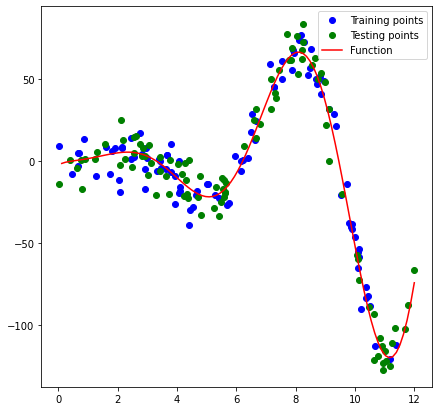

In [98]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train,yy_train, 'o', color='blue', label='Training points')
plt.plot(XX_test,yy_test, 'o', color='green', label='Testing points')

points = np.linspace(low, high,num=100)
plt.plot(points, funct(points),  color='red', label='Function')
plt.legend()


plt.show


**Preparing the data**

It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), we will subtract the mean of the feature and divide by the standard deviation, so that the feature will be centered around 0 and will have a unit standard deviation. This is easily done in Numpy:


In [99]:
mean = XX_train.mean(axis=0)
XX_train_n = XX_train-mean
std = XX_train_n.std(axis=0)
XX_train_n /= std

XX_test_n = XX_test - mean
XX_test_n /= std

meany = yy_train.mean(axis=0)
yy_train_n = yy_train - meany
stdy = yy_train_n.std(axis=0)
yy_train_n /= stdy

yy_test_n = yy_test - meany
yy_test_n /= stdy



#XX_train_n = XX_train_n.reshape((len(XX_train_n),1))
#XX_test_n  = XX_test_n.reshape((len(XX_test_n),1))


In [100]:
# import hyperopt
from hyperopt import fmin, tpe, rand, hp, STATUS_OK, Trials, plotting

Define objective

In [101]:
fspace = {
    'units':   hp.quniform('units', 32,1024,1), 
    'dropout': hp.uniform('dropout', 0,0.5),
    'act':     hp.choice('act',['sigmoid','linear','relu']),
    'lr' :     hp.uniform('lr', 0, 0.1),
    #'epochs' = hp.quniform('epochs', 10,100,1))
    
}
epochs = 400

def objective(params):

    print(params['act'],params['units'],params['dropout'],params['lr'])

    model0 = Sequential(name='network')
    model0.add(Dense(int(params['units']), input_shape = (1,), activation = params['act']))
    model0.add(Dropout(params['dropout']))
    model0.add(Dense(int(params['units']), activation = params['act']))
    model0.add(Dropout(params['dropout']))
    model0.add(Dense(1,activation='linear'))

    #sgd0 = optimizers.SGD(lr = 0.01)    # stochastic gradient descent optimizer

    #  early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
    model0.compile(optimizer = optimizers.Adam(lr=params['lr']), loss = 'mean_squared_error', metrics = ['mse'])    # for regression problems, mean squared error (MSE) is often employed
    history = model0.fit(XX_train_n, yy_train_n, batch_size = 128, epochs = epochs, validation_data=(XX_test_n, yy_test_n), verbose = 0 , callbacks=[es])


    # Evaluate the model accuracy on the validation set.
    score = model0.evaluate(XX_test_n, yy_test_n, verbose=0)
    return score[1]

# Find the best parameters

In [102]:
trials = Trials()

# possible algos: algo= (tpe.suggest, rand.suggest)
best = fmin(fn=objective, space=fspace, algo=tpe.suggest,  max_evals=100, trials=trials, verbose=1)



linear
287.0
0.25289039799437396
0.002879738129880927
Epoch 00057: early stopping
relu
409.0
0.22424460099262583
0.035660227001630455
Epoch 00398: early stopping
relu
596.0
0.2867732702492053
0.09910447721183521
Epoch 00146: early stopping
sigmoid
389.0
0.34937283081952003
0.05596687771279665
Epoch 00140: early stopping
sigmoid
546.0
0.3459569653044457
0.09915542355273164
Epoch 00061: early stopping
relu
389.0
0.2889644707799094
0.046098640098307955
Epoch 00077: early stopping
sigmoid
518.0
0.38080906053870994
0.005091331832085611
relu
54.0
0.029218870412117348
0.010660094425988765
Epoch 00222: early stopping
linear
98.0
0.28692740468731315
0.07059737908732064
Epoch 00074: early stopping
sigmoid
692.0
0.18980420528188335
0.07548777031858399
Epoch 00151: early stopping
sigmoid
896.0
0.036922087186477326
0.0733505328808671
Epoch 00160: early stopping
linear
144.0
0.11040506722178389
0.07139901562742776
Epoch 00079: early stopping
linear
280.0
0.36194354855460387
0.013932480700079176
Epoc

In [103]:
print('Best result:', best)


Best result: {'act': 2, 'dropout': 0.011280329847350418, 'lr': 0.05091472382546426, 'units': 616.0}


In [104]:
#print(trials.trials)

avg best error: 0.062219683080911636


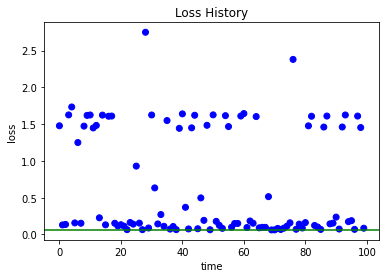

In [105]:
plotting.main_plot_history(trials)

Showing Histogram of 100 jobs


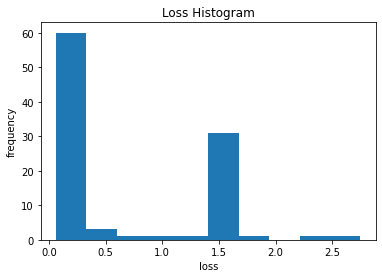

In [106]:
plotting.main_plot_histogram(trials)

finite loss range 0.062219683080911636 2.7489569187164307 -0.9377803169190884


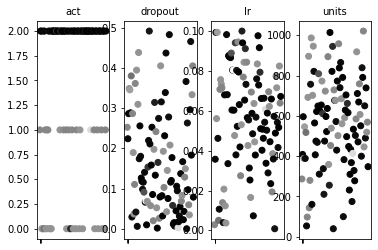

In [107]:
plotting.main_plot_vars(trials)

[{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 1.47758150100708, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'act': [0], 'dropout': [0], 'lr': [0], 'units': [0]}, 'vals': {'act': [1], 'dropout': [0.25289039799437396], 'lr': [0.002879738129880927], 'units': [287.0]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 12, 7, 22, 51, 4, 239000), 'refresh_time': datetime.datetime(2020, 12, 7, 22, 51, 5, 985000)}, {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.12999211251735687, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'act': [1], 'dropout': [1], 'lr': [1], 'units': [1]}, 'vals': {'act': [2], 'dropout': [0.22424460099262583], 'lr': [0.035660227001630455], 'units': [409.0]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 12, 7, 22, 51, 5, 988000), 'refresh_time': date

Text(0, 0.5, '$units$')

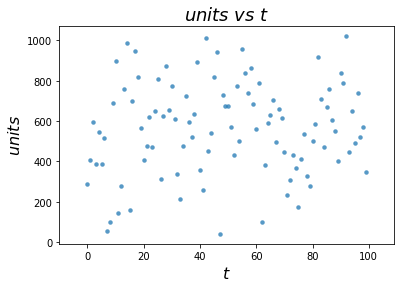

In [108]:
f, ax = plt.subplots(1)
print(trials.trials)
xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['units'] for t in trials.trials]

ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$units$ $vs$ $t$ ', fontsize=18)
ax.set_xlabel('$t$', fontsize=16)
ax.set_ylabel('$units$', fontsize=16)

Text(0, 0.5, '$loss$')

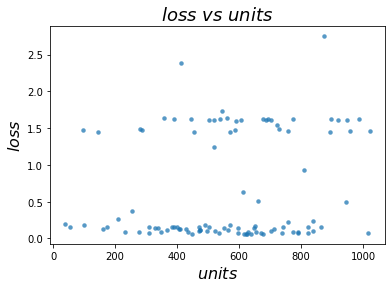

In [109]:
f, ax = plt.subplots(1)

xs = [t['misc']['vals']['units'] for t in trials.trials]
ys = [t['result']['loss'] for t in trials.trials]

ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$loss$ $vs$ $units$ ', fontsize=18)
ax.set_xlabel('$units$', fontsize=16)
ax.set_ylabel('$loss$', fontsize=16)

Text(0, 0.5, '$loss$')

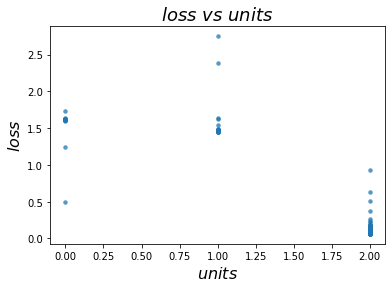

In [122]:
f, ax = plt.subplots(1)

xs = [t['misc']['vals']['act'] for t in trials.trials]
ys = [t['result']['loss'] for t in trials.trials]

ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$loss$ $vs$ $units$ ', fontsize=18)
ax.set_xlabel('$units$', fontsize=16)
ax.set_ylabel('$loss$', fontsize=16)

# Train neural net with the best parameters

In [118]:
print(best)

units = best['units']
dropout = best['dropout']
act_l = best['act']
act_n=['sigmoid','linear','relu']
act = act_n[act_l]
lr = best['lr']
#epochs = best['epochs']
epochs=400

print(act,units,dropout,lr)

model0 = Sequential(name='network')
model0.add(Dense(units, input_shape = (1,), activation = act))
model0.add(Dropout(dropout))
model0.add(Dense(units,  activation = act))
model0.add(Dropout(dropout))
model0.add(Dense(1,activation='linear'))

    #sgd0 = optimizers.SGD(lr = 0.01)    # stochastic gradient descent optimizer

#  early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
model0.compile(optimizer = optimizers.Adam(lr=lr), loss = 'mean_squared_error', metrics = ['mse'])    # for regression problems, mean squared error (MSE) is often employed
history = model0.fit(XX_train_n, yy_train_n, batch_size = 128, epochs = epochs, validation_data=(XX_test_n, yy_test_n), verbose = 1, callbacks=[es] )


# Evaluate the model accuracy on the validation set.
score = model0.evaluate(XX_test_n, yy_test_n, verbose=0)

{'act': 2, 'dropout': 0.011280329847350418, 'lr': 0.05091472382546426, 'units': 616.0}
relu 616.0 0.011280329847350418 0.05091472382546426
Epoch 1/400
1/1 [==============================] - 0s 93ms/step - loss: 0.9741 - mse: 0.9741 - val_loss: 254.4113 - val_mse: 254.4113
Epoch 2/400
1/1 [==============================] - 0s 15ms/step - loss: 238.8394 - mse: 238.8394 - val_loss: 8.1138 - val_mse: 8.1138
Epoch 3/400
1/1 [==============================] - 0s 15ms/step - loss: 6.9239 - mse: 6.9239 - val_loss: 3.7650 - val_mse: 3.7650
Epoch 4/400
1/1 [==============================] - 0s 15ms/step - loss: 2.6958 - mse: 2.6958 - val_loss: 1.8717 - val_mse: 1.8717
Epoch 5/400
1/1 [==============================] - 0s 15ms/step - loss: 1.1368 - mse: 1.1368 - val_loss: 1.0818 - val_mse: 1.0818
Epoch 6/400
1/1 [==============================] - 0s 15ms/step - loss: 0.9126 - mse: 0.9126 - val_loss: 0.8669 - val_mse: 0.8669
Epoch 7/400
1/1 [==============================] - 0s 15ms/step - loss: 0

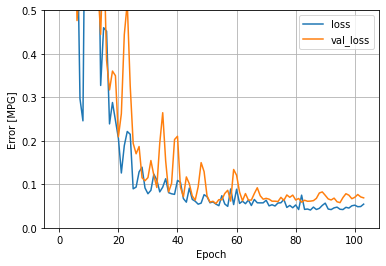

In [119]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.5])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)


Evaluate neural network

In [120]:
results = model0.evaluate(XX_test_n, yy_test_n)

print('loss test data: ', results[0])
print('mse test data: ', results[1])

results = model0.evaluate(XX_train_n, yy_train_n)

print('loss train data: ', results[0])
print('mse train data: ', results[1])

4/4 [==============================] - 0s 2ms/step - loss: 0.0688 - mse: 0.0688
loss test data:  0.06884535402059555
mse test data:  0.06884535402059555
4/4 [==============================] - 0s 2ms/step - loss: 0.0362 - mse: 0.0362
loss train data:  0.03621169924736023
mse train data:  0.03621169924736023


Plot results

<function matplotlib.pyplot.show>

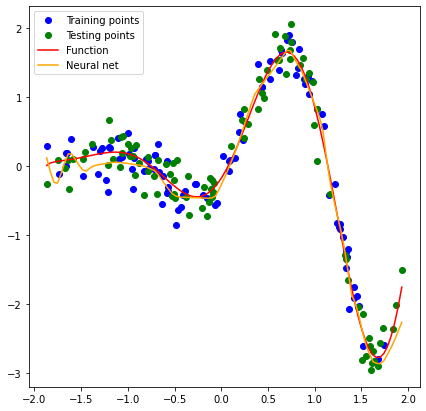

In [121]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train_n,yy_train_n, 'o', color='blue', label='Training points')
plt.plot(XX_test_n,yy_test_n, 'o', color='green', label='Testing points')

points = np.linspace(min(XX_test_n), max(XX_test_n),num=100)
plt.plot(points, (funct(points*std+mean)-meany)/stdy,  color='red', label='Function')

plt.plot(points, model0.predict(points),  color='orange', label='Neural net')

#plt.plot(XX_train_n, model0.predict(XX_train_n), 'o',  color='red', label='NN')

plt.legend()


plt.show

Evaluate neural network

In [114]:
results = model0.evaluate(XX_test_n, yy_test_n)

print('loss test data: ', results[0])
print('mse test data: ', results[1])

results = model0.evaluate(XX_train_n, yy_train_n)

print('loss train data: ', results[0])
print('mse train data: ', results[1])

4/4 [==============================] - 0s 2ms/step - loss: 0.1126 - mse: 0.1126
loss test data:  0.11260498315095901
mse test data:  0.11260498315095901
4/4 [==============================] - 0s 2ms/step - loss: 0.0347 - mse: 0.0347
loss train data:  0.03473014757037163
mse train data:  0.03473014757037163


Plot results

<function matplotlib.pyplot.show>

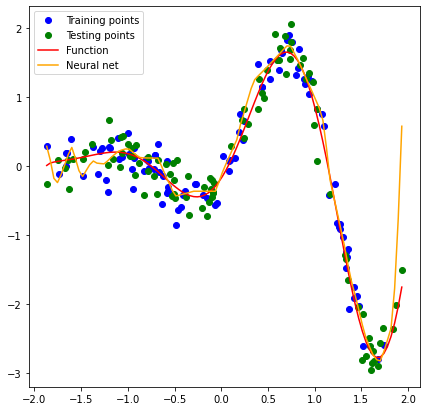

In [115]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train_n,yy_train_n, 'o', color='blue', label='Training points')
plt.plot(XX_test_n,yy_test_n, 'o', color='green', label='Testing points')

points = np.linspace(min(XX_test_n), max(XX_test_n),num=100)
plt.plot(points, (funct(points*std+mean)-meany)/stdy,  color='red', label='Function')

plt.plot(points, model0.predict(points),  color='orange', label='Neural net')

#plt.plot(XX_train_n, model0.predict(XX_train_n), 'o',  color='red', label='NN')

plt.legend()


plt.show